# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies here

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
print("success")

success


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

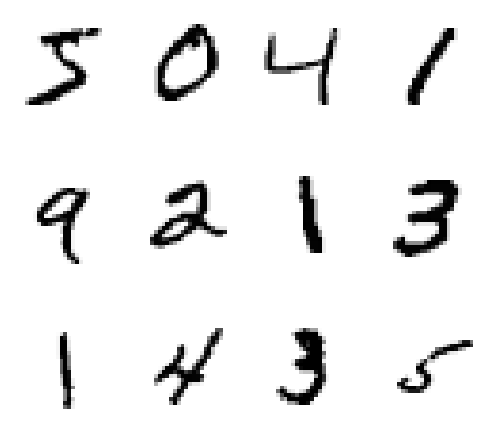

In [5]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

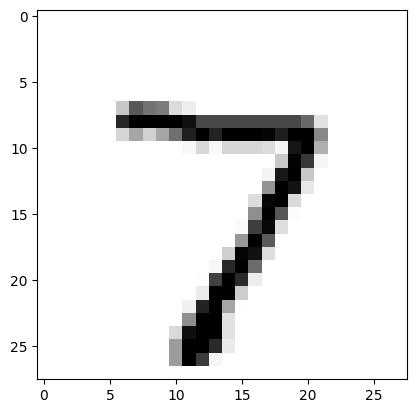

In [9]:
_ = plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [23]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Train!

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0927 - accuracy: 0.1082 - val_loss: 0.0921 - val_accuracy: 0.1125
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.1141 - val_loss: 0.0914 - val_accuracy: 0.1145
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.1167 - val_loss: 0.0909 - val_accuracy: 0.1212
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.1248 - val_loss: 0.0905 - val_accuracy: 0.1327
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1428 - val_loss: 0.0901 - val_accuracy: 0.1518
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.1691 - val_loss: 0.0898 - val_accuracy: 0.1811
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.2013 - val_loss: 0.0894 - val_accuracy: 0.2177

#### Evaluating model performance

In [25]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.8586


[0.028574416413903236, 0.8586000204086304]

#### Performing inference

In [26]:
valid_0 = X_valid[0].reshape(1, 784)

In [27]:
model.predict(valid_0)

1/1 [==============================] - 0s 90ms/step


array([[4.0981658e-03, 1.0899013e-03, 3.9723762e-03, 7.7837198e-03,
        6.3838577e-03, 8.0801407e-03, 8.3499949e-04, 9.2163819e-01,
        4.1949092e-03, 4.1923724e-02]], dtype=float32)

In [29]:
# model.predict_classes(valid_0)

In [30]:
# The predict_classes() method no longer exists in recent TensorFlow releases. 
# Instead you could use:
import numpy as np
np.argmax(model.predict(valid_0), axis=-1)

1/1 [==============================] - 0s 21ms/step


array([7])